In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
colors1 = cmap(np.arange(4)*4)
import numpy as np
import cv2

In [ ]:
df = pd.read_csv('Test-Train-Split.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      8 non-null      int64 
 1   Type    8 non-null      object
 2   Class   8 non-null      object
 3   Count   8 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 384.0+ bytes


In [ ]:
df.isna().any()

No       False
Type     False
Class    False
Count    False
dtype: bool

In [ ]:
df["Class"].unique() 

array(['common_rust', 'gray_leaf_spot', 'healthy', 'northern_leaf_blight'],
      dtype=object)

In [ ]:
train_df = df[df['Type']=='Training']
test_df  = df[df['Type']=='Training']

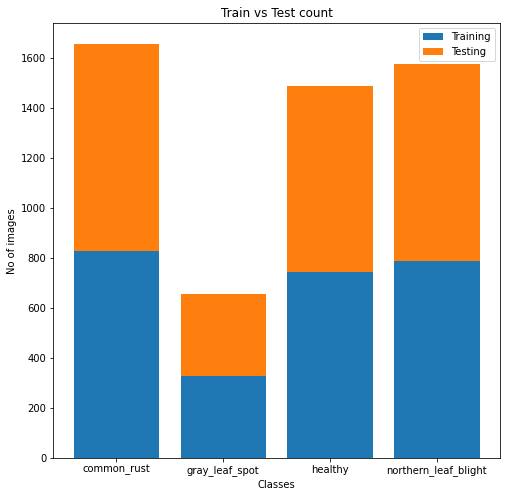

In [ ]:
plt.figure(figsize=(8, 8))
plt.bar(train_df['Class'],train_df['Count'])
plt.bar(test_df['Class'],test_df['Count'], bottom = train_df['Count'])
plt.xlabel("Classes")
plt.ylabel("No of images")
plt.legend(['Training','Testing'])
plt.title('Train vs Test count')
plt.show()

In [ ]:
combined_df = df.groupby("Class")["Count"].sum()

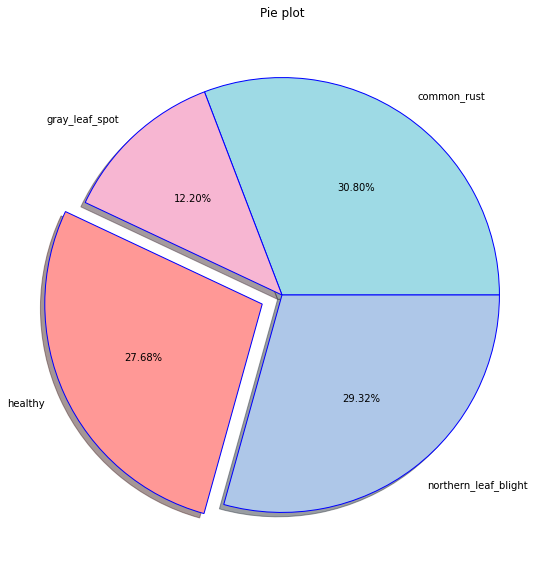

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
size = 0.3
cmap = plt.get_cmap("tab20_r")
outer_colors = cmap(np.arange(6)*6)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
explode = (0, 0, 0.1, 0)
ax.pie(combined_df,colors=outer_colors,autopct='%1.2f%%',explode=explode,shadow=True,wedgeprops=dict( edgecolor='b'),radius=1,labels=['common_rust', 'gray_leaf_spot', 'healthy', 'northern_leaf_blight'])
#ax.pie(test_df['Count'],colors=inner_colors,wedgeprops=dict( edgecolor='b'),radius=1-size)

ax.set(aspect="equal", title='Pie plot')
plt.show()

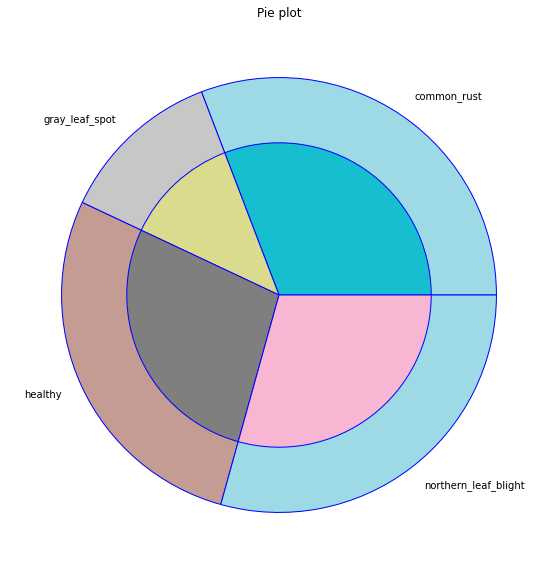

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
size = 0.3
cmap = plt.get_cmap("tab20_r")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(train_df['Count'],labels= (train_df['Class']),colors=outer_colors,wedgeprops=dict( edgecolor='b'),radius=1)
ax.pie(test_df['Count'],colors=inner_colors,wedgeprops=dict( edgecolor='b'),radius=1-size)

ax.set(aspect="equal", title='Pie plot')
plt.show()

In [ ]:
combined_df[combined_df==combined_df.max()]

Class
common_rust    1035
Name: Count, dtype: int64

In [ ]:
combined_df[combined_df==combined_df.min()]

Class
gray_leaf_spot    410
Name: Count, dtype: int64

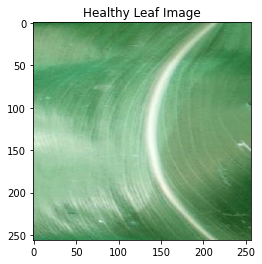

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Master/Fall 22/DS Project/Training/healthy/00031d74-076e-4aef-b040-e068cd3576eb___R.S_HL 8315 copy 2.jpg')
plt.title("Healthy Leaf Image")
plt.imshow(img)

Image Shape: (256, 256, 3)
Image Size: 196608
Image DType: uint8
(256, 256)


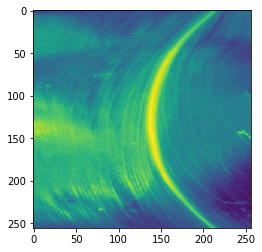

In [ ]:
print("Image Shape:" ,img.shape)
print("Image Size:" ,img.size)
print("Image DType:",img.dtype)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)
plt.imshow(gray)

In [ ]:
data =[]
array = cv2.resize(img,(224, 224)) 
data.append([array,'healthy'])

In [ ]:
data[0][1]

'healthy'

In [ ]:
data_vector = data[0][0].reshape(-1,224,224,3)

In [ ]:
data_vector

array([[[[ 39, 113,  55],
         [ 43, 117,  59],
         [ 46, 120,  62],
         ...,
         [ 79, 147,  92],
         [ 79, 147,  92],
         [ 80, 148,  93]],

        [[ 50, 121,  64],
         [ 49, 122,  64],
         [ 49, 120,  63],
         ...,
         [ 81, 150,  94],
         [ 83, 150,  95],
         [ 85, 153,  98]],

        [[ 62, 131,  74],
         [ 57, 127,  70],
         [ 55, 124,  67],
         ...,
         [ 84, 152,  97],
         [ 86, 154,  99],
         [ 88, 156, 101]],

        ...,

        [[ 72, 143,  96],
         [ 71, 142,  95],
         [ 69, 139,  92],
         ...,
         [ 59, 106,  57],
         [ 63, 110,  61],
         [ 68, 115,  66]],

        [[ 63, 137,  89],
         [ 63, 136,  89],
         [ 62, 136,  88],
         ...,
         [ 57, 105,  56],
         [ 59, 106,  57],
         [ 66, 113,  64]],

        [[ 58, 134,  86],
         [ 58, 134,  86],
         [ 59, 135,  87],
         ...,
         [ 58, 105,  56],
        

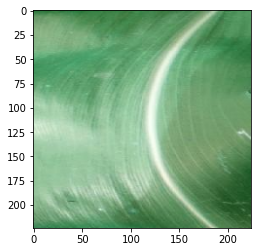

In [ ]:
plt.imshow(data_vector.reshape(224,224,3))